# Exploratory Data Analysis



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Telco-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


# XGBoost Model

In [3]:
# target
df["Churn"] = (df["Churn"] == "Yes").astype(int)

# TotalCharges sometimes loads as string with blanks
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [4]:
df["charges_per_tenure"] = df["MonthlyCharges"] / (df["tenure"] + 1)

df["tenure_bucket"] = pd.cut(
    df["tenure"],
    bins=[-1, 6, 12, 24, 48, 200],
    labels=["0-6", "6-12", "12-24", "24-48", "48+"]
)

df["is_month_to_month"] = (df["Contract"] == "Month-to-month").astype(int)
df["is_echeck"] = (df["PaymentMethod"] == "Electronic check").astype(int)

# “high value” heuristic
df["high_monthly_charges"] = (df["MonthlyCharges"] >= df["MonthlyCharges"].quantile(0.75)).astype(int)
df["low_tenure"] = (df["tenure"] <= 12).astype(int)
df["high_value_low_tenure"] = (df["high_monthly_charges"] & df["low_tenure"]).astype(int)


In [5]:
!pip install xgboost

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, average_precision_score
from xgboost import XGBClassifier

X = df.drop(columns=["Churn", "customerID"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ],
    remainder="drop",
)

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()


xgb = XGBClassifier(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)


xgb_model = Pipeline([
    ("prep", preprocessor),
    ("clf", xgb)
])

xgb_model.fit(X_train, y_train)

y_prob = xgb_model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("PR-AUC:", average_precision_score(y_test, y_prob))


ROC-AUC: 0.832265106306027
PR-AUC: 0.6402862580737396


In [15]:
!pip install shap


In [16]:
import shap
import numpy as np

# Fit preprocessor separately so we can transform + get feature names
prep = xgb_model.named_steps["prep"]
clf = xgb_model.named_steps["clf"]

X_train_p = prep.transform(X_train)
X_test_p  = prep.transform(X_test)

# Feature names (works for sklearn >= 1.0)
feature_names = prep.get_feature_names_out()


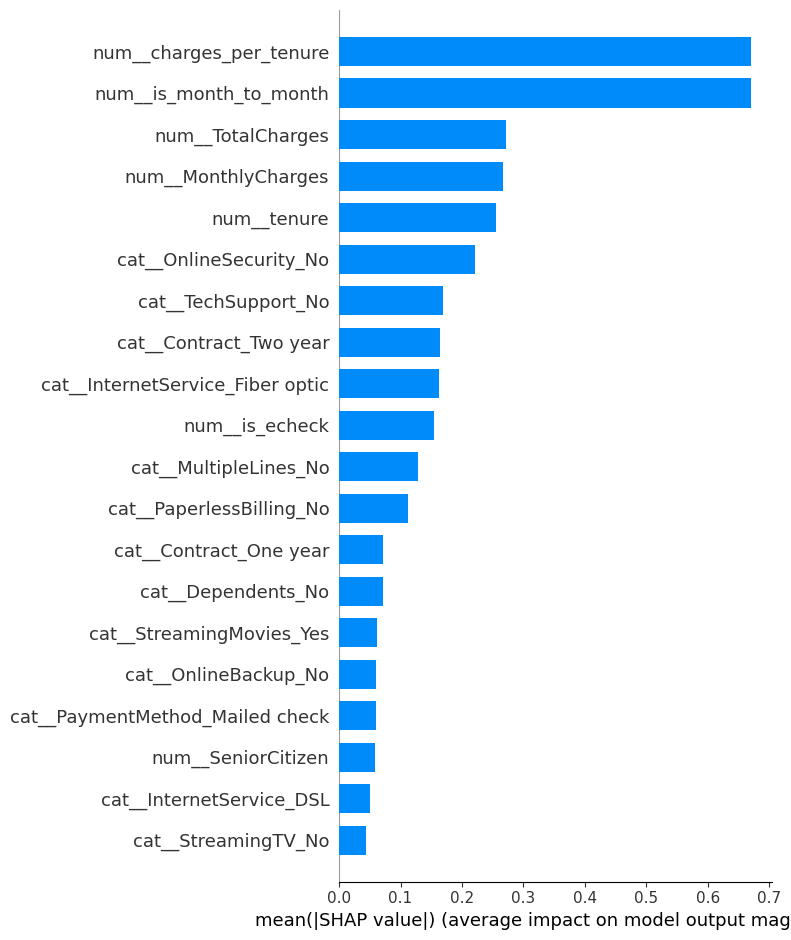

In [17]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_p)

# Bar summary = easiest, recruiter-friendly
shap.summary_plot(shap_values, X_test_p, feature_names=feature_names, plot_type="bar")


In [19]:
import pandas as pd

imp = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)
imp.head(20)


,0
num__is_month_to_month,0.254066
cat__Contract_Month-to-month,0.155697
cat__InternetService_Fiber optic,0.111330
cat__tenure_bucket_0-6,0.068612
cat__OnlineSecurity_No,0.028765
cat__PhoneService_Yes,0.023754
cat__TechSupport_No,0.020894
cat__StreamingMovies_Yes,0.020385
cat__Contract_One year,0.014881
num__charges_per_tenure,0.014215


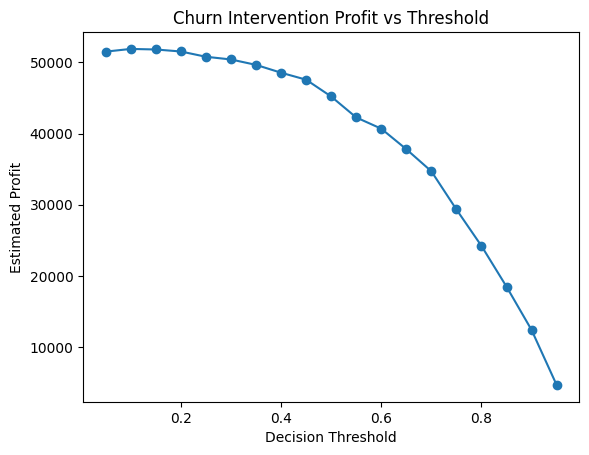

Best threshold: 0.1
Targeted %: 67.1 %
Profit: 51880


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def profit_at_threshold(y_true, y_prob, threshold, C_offer=20, B_save=200):
    y_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    targeted = tp + fp                 # people you spend money on
    saved = tp                         # true churners you correctly targeted
    profit = saved * B_save - targeted * C_offer

    return profit, targeted, saved, tp, fp, fn, tn

thresholds = np.linspace(0.05, 0.95, 19)
profits = []
targets = []

for t in thresholds:
    p, targeted, saved, *_ = profit_at_threshold(y_test.values, y_prob, t, C_offer=20, B_save=200)
    profits.append(p)
    targets.append(targeted / len(y_test))

plt.figure()
plt.plot(thresholds, profits, marker="o")
plt.xlabel("Decision Threshold")
plt.ylabel("Estimated Profit")
plt.title("Churn Intervention Profit vs Threshold")
plt.show()

best_idx = int(np.argmax(profits))
print("Best threshold:", thresholds[best_idx])
print("Targeted %:", round(targets[best_idx]*100, 1), "%")
print("Profit:", round(profits[best_idx], 2))
